In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv 
from numpy.linalg import norm

In [59]:
# Subroutine to evaluate the line between two points at a given x point
def lineThrough2Points(point1, point2, eval): 
    return ((eval - point1[0])/(point2[0] - point1[0])) * (point2[1] - point1[1]) + point1[1]

C:\Users\maddr\AppData\Local\Temp\ipykernel_13676\2864799574.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


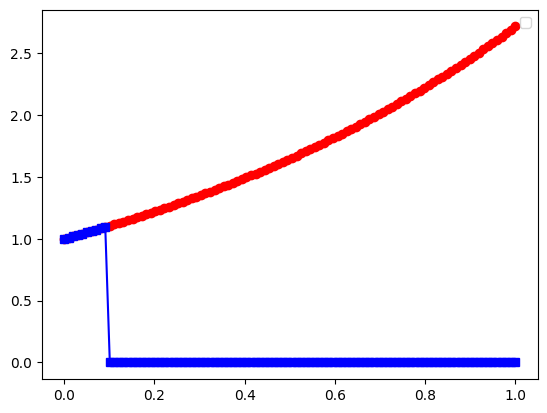

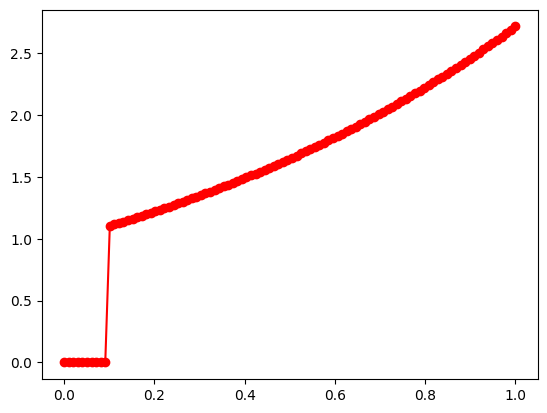

In [85]:
def driver():
    
    f = lambda x: math.exp(x)
    a = 0
    b = 1
    
    ''' create points you want to evaluate at'''
    Neval = 100
    xeval =  np.linspace(a,b,Neval)
    
    ''' number of intervals'''
    Nint = 10
    
    '''evaluate the linear spline'''
    yeval = eval_lin_spline(xeval,Neval,a,b,f,Nint)
    
    ''' evaluate f at the evaluation points'''
    fex = np.zeros(Neval)
    
    for j in range(Neval):
        fex[j] = f(xeval[j]) 
      
    j = np.arange(1, Neval, 1)
    
    plt.figure()
    plt.plot(xeval, fex, 'ro-')
    plt.plot(xeval, yeval, 'bs-')
    plt.legend()
    plt.show()   
     
     
    err = abs(yeval-fex)
    plt.figure()
    plt.plot(xeval, err, 'ro-')
    plt.show()            

    
    
def  eval_lin_spline(xeval,Neval,a,b,f,Nint):

    '''create the intervals for piecewise approximations'''
    xint = np.linspace(a,b,Nint+1)
   
    '''create vector to store the evaluation of the linear splines'''
    yeval = np.zeros(Neval) 
    
    for jint in range(Nint):

        a1= xint[jint]
        fa1 = f(a1)
        b1 = xint[jint + 1]
        fb1 = f(b1)

        ind = np.where((xeval >= a1) & (xeval <= b1))
        xloc = xeval[ind]
        n = len(xloc)

        yloc = np.zeros(len(xloc))
        
        for kk in range(n):
           '''use your line evaluator to evaluate the lines at each of the points in the interval'''
           '''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with the points (a1,fa1) and (b1,fb1)'''
           yloc[kk] = lineThrough2Points([a1, fa1], [b1, fb1], xeval[kk])
           
        yeval[ind] = yloc

        return yeval


driver()          


In [34]:
point1 = np.array([0, 1]);
point2 = np.array([3, 5]);

evalAt = 0;

lineThrough2Points(point1, point2, evalAt)

1.0

In [70]:
yeval = np.zeros(1000)
yeval[100] = 100